In [ ]:
# 1. Implement a CNN architecture from scratch for image classification.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
num_classes = info.features['label'].num_classes

train_size = 0.8
dataset_size = info.splits['train'].num_examples
train_count = int(train_size * dataset_size)

train_dataset = dataset['train'].take(train_count)
test_dataset = dataset['train'].skip(train_count)

print("Total images:", dataset_size)
print("Training images:", train_count)
print("Testing images:", dataset_size - train_count)


Total images: 3670
Training images: 2936
Testing images: 734


In [ ]:
IMG_SIZE = 180

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

BATCH_SIZE = 32
train_dataset = train_dataset.map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


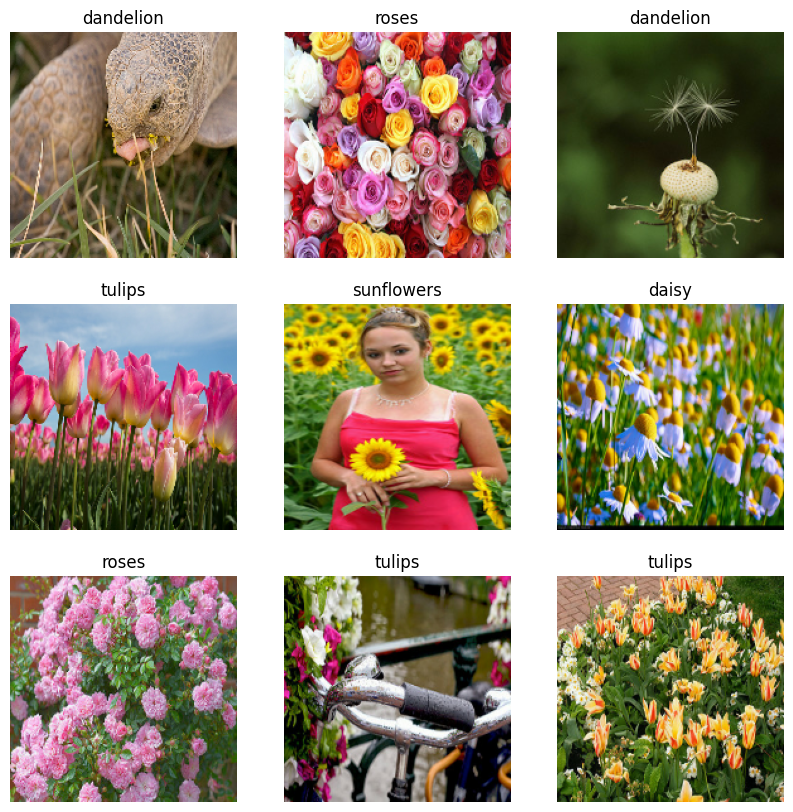

In [ ]:
class_names = info.features['label'].names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.3425 - loss: 1.5138 - val_accuracy: 0.5817 - val_loss: 1.0641
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.5217 - loss: 1.1110 - val_accuracy: 0.6090 - val_loss: 0.9662
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6247 - loss: 0.9291 - val_accuracy: 0.6281 - val_loss: 0.8992
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6970 - loss: 0.7954 - val_accuracy: 0.7030 - val_loss: 0.8026
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7595 - loss: 0.6285 - val_accuracy: 0.6676 - val_loss: 0.8853
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8343 - loss: 0.4630 - val_accuracy: 0.6471 - val_loss: 0.9623
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8768 - loss: 0.3328 - val_accuracy: 0.7098 - val_loss: 0.9295
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.9353 - loss: 0.1917 - val_accuracy: 0.7234 - v

In [9]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Accuracy:", test_acc)


23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 506ms/step - accuracy: 0.6594 - loss: 1.6684
Test Accuracy: 0.6989100575447083


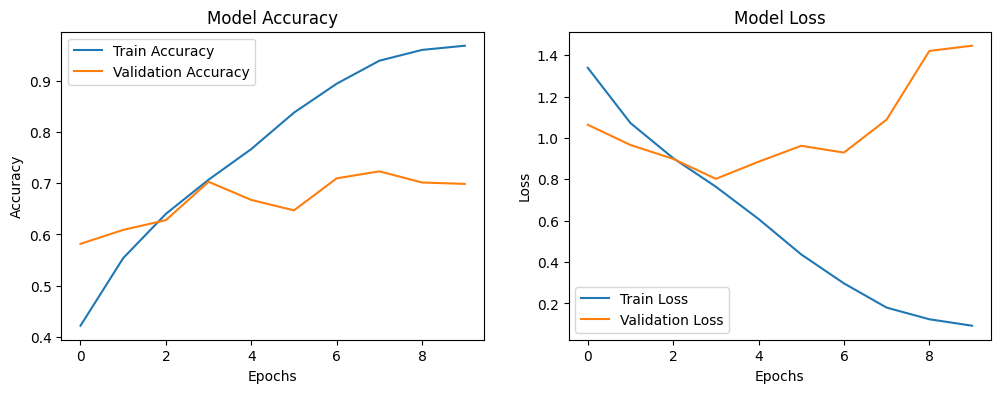

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


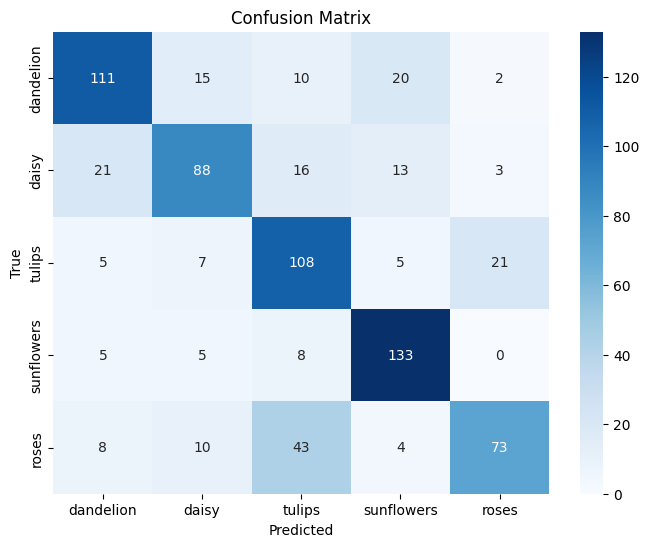


Classification Report:

              precision    recall  f1-score   support

   dandelion       0.74      0.70      0.72       158
       daisy       0.70      0.62      0.66       141
      tulips       0.58      0.74      0.65       146
  sunflowers       0.76      0.88      0.82       151
       roses       0.74      0.53      0.62       138

    accuracy                           0.70       734
   macro avg       0.71      0.70      0.69       734
weighted avg       0.71      0.70      0.70       734



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_flower(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()

